In [16]:
import sys
sys.path.append('..')

import os
from pathlib import Path

import re
import nltk 
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)


import numpy as np 

from src.embedders import LASEREmbedder


# Dataset creation

In [2]:
collection3_dir = Path('../data/Datasets/Collection3/')



In [3]:
documents = []




for e in os.listdir(collection3_dir):
    if '.txt' in e:
        text_file_path = Path(collection3_dir / e)
        ann_file_path = Path( collection3_dir / e.replace('.txt', '.ann'))
        print(text_file_path)
        
        # get ner annotations
        with open(str(ann_file_path), 'r') as f:
            file_data = f.read()
        
        file_data = file_data.replace('\t', ' ')

        ner_strings = file_data.split('\n')
        
        ner_data = []
        for ner_string in ner_strings:
            split_string = ner_string.split(' ')
            if len(split_string) < 4: continue
            ner_data.append([split_string[0], split_string[1], split_string[2],split_string[3],  ' '.join(split_string[4:])])
        
        #parsing txt file
        with open(str(text_file_path), 'r') as f:
            
            sentences = []
            lines = []
            s = 0
            for line in f:
                if line == '\n': 
                    s+=2
                    continue
                line = line.strip('\n')
                new_line = line
                lines.append(line)
                line_length = len(line)
#                 print(line)
                for ner_token in ner_data:
                    if int(ner_token[2]) < s or int(ner_token[3]) > line_length+s: 
                        continue
                    
                    
                    new_line = new_line.replace(line[int(ner_token[2])-s:int(ner_token[3])-s], ner_token[0]+"XXXXXXXXXXX", 1)
                    
                s+=line_length+2
                
#                 print(new_line)
                sentences.append(new_line)
        
        
        new_sentences = []
        
        
        
        
        for sentence in sentences:
            
            for s in nltk.sent_tokenize(sentence, language="russian"):
                new_sentences.append(s)
        
#         print('Before:')
#         print(len(sentences), sentences)
        
#         print('After:')
#         print(len(new_sentences), new_sentences)
        documents.append((ner_data, new_sentences))
        
        print("======================================================")    

../data/Datasets/Collection3/164.txt
../data/Datasets/Collection3/027.txt
../data/Datasets/Collection3/191.txt
../data/Datasets/Collection3/346.txt
../data/Datasets/Collection3/054.txt
../data/Datasets/Collection3/602.txt
../data/Datasets/Collection3/017.txt
../data/Datasets/Collection3/552.txt
../data/Datasets/Collection3/348.txt
../data/Datasets/Collection3/last_68.txt
../data/Datasets/Collection3/258.txt
../data/Datasets/Collection3/2013.txt
../data/Datasets/Collection3/15_01_13f.txt
../data/Datasets/Collection3/405.txt
../data/Datasets/Collection3/1035.txt
../data/Datasets/Collection3/1147.txt
../data/Datasets/Collection3/25_12_12c.txt
../data/Datasets/Collection3/046.txt
../data/Datasets/Collection3/596.txt
../data/Datasets/Collection3/116.txt
../data/Datasets/Collection3/098.txt
../data/Datasets/Collection3/406.txt
../data/Datasets/Collection3/last_30_new.txt
../data/Datasets/Collection3/427.txt
../data/Datasets/Collection3/1119.txt
../data/Datasets/Collection3/077.txt
../data/Da

../data/Datasets/Collection3/412.txt
../data/Datasets/Collection3/316.txt
../data/Datasets/Collection3/273.txt
../data/Datasets/Collection3/353.txt
../data/Datasets/Collection3/489.txt
../data/Datasets/Collection3/last_34.txt
../data/Datasets/Collection3/1031.txt
../data/Datasets/Collection3/20_11_12c.txt
../data/Datasets/Collection3/mvd2.txt
../data/Datasets/Collection3/473.txt
../data/Datasets/Collection3/013.txt
../data/Datasets/Collection3/1040.txt
../data/Datasets/Collection3/2023.txt
../data/Datasets/Collection3/296.txt
../data/Datasets/Collection3/075.txt
../data/Datasets/Collection3/shojgu4.txt
../data/Datasets/Collection3/03_12_12d.txt
../data/Datasets/Collection3/446.txt
../data/Datasets/Collection3/062.txt
../data/Datasets/Collection3/2007.txt
../data/Datasets/Collection3/215.txt
../data/Datasets/Collection3/254.txt
../data/Datasets/Collection3/last_62.txt
../data/Datasets/Collection3/360.txt
../data/Datasets/Collection3/206.txt
../data/Datasets/Collection3/147.txt
../data/D

../data/Datasets/Collection3/404.txt
../data/Datasets/Collection3/10_01_13i.txt
../data/Datasets/Collection3/10_01_13d.txt
../data/Datasets/Collection3/333.txt
../data/Datasets/Collection3/1032.txt
../data/Datasets/Collection3/016.txt
../data/Datasets/Collection3/423.txt
../data/Datasets/Collection3/056.txt
../data/Datasets/Collection3/465.txt
../data/Datasets/Collection3/1105.txt
../data/Datasets/Collection3/370.txt
../data/Datasets/Collection3/291.txt
../data/Datasets/Collection3/449.txt
../data/Datasets/Collection3/175.txt
../data/Datasets/Collection3/321.txt
../data/Datasets/Collection3/091.txt
../data/Datasets/Collection3/2011.txt
../data/Datasets/Collection3/04_12_12f.txt
../data/Datasets/Collection3/376.txt
../data/Datasets/Collection3/271.txt
../data/Datasets/Collection3/559.txt
../data/Datasets/Collection3/turkmenija.txt
../data/Datasets/Collection3/403.txt
../data/Datasets/Collection3/443.txt
../data/Datasets/Collection3/611.txt
../data/Datasets/Collection3/last_41.txt
../dat

../data/Datasets/Collection3/1200.txt
../data/Datasets/Collection3/last_35.txt
../data/Datasets/Collection3/048.txt
../data/Datasets/Collection3/blokhin.txt
../data/Datasets/Collection3/klinton.txt
../data/Datasets/Collection3/328.txt
../data/Datasets/Collection3/415.txt
../data/Datasets/Collection3/546.txt
../data/Datasets/Collection3/434.txt
../data/Datasets/Collection3/105.txt
../data/Datasets/Collection3/224.txt
../data/Datasets/Collection3/045.txt
../data/Datasets/Collection3/2004.txt
../data/Datasets/Collection3/123.txt
../data/Datasets/Collection3/053.txt
../data/Datasets/Collection3/last_13.txt
../data/Datasets/Collection3/305.txt
../data/Datasets/Collection3/212.txt
../data/Datasets/Collection3/529.txt
../data/Datasets/Collection3/095.txt
../data/Datasets/Collection3/241.txt
../data/Datasets/Collection3/1152.txt
../data/Datasets/Collection3/487.txt
../data/Datasets/Collection3/072.txt
../data/Datasets/Collection3/071.txt
../data/Datasets/Collection3/597.txt
../data/Datasets/Co

../data/Datasets/Collection3/1150.txt
../data/Datasets/Collection3/311.txt
../data/Datasets/Collection3/352.txt
../data/Datasets/Collection3/308.txt
../data/Datasets/Collection3/1028.txt
../data/Datasets/Collection3/1179.txt
../data/Datasets/Collection3/1125.txt
../data/Datasets/Collection3/388.txt
../data/Datasets/Collection3/1045.txt
../data/Datasets/Collection3/25_12_12a.txt
../data/Datasets/Collection3/066.txt
../data/Datasets/Collection3/236.txt
../data/Datasets/Collection3/089.txt
../data/Datasets/Collection3/419.txt
../data/Datasets/Collection3/1018.txt
../data/Datasets/Collection3/22_11_12j.txt
../data/Datasets/Collection3/1160.txt
../data/Datasets/Collection3/30_11_12b.txt
../data/Datasets/Collection3/1041.txt
../data/Datasets/Collection3/039.txt
../data/Datasets/Collection3/2045.txt
../data/Datasets/Collection3/547.txt
../data/Datasets/Collection3/168.txt
../data/Datasets/Collection3/416.txt
../data/Datasets/Collection3/15_01_13e.txt
../data/Datasets/Collection3/1048.txt
../d

../data/Datasets/Collection3/378.txt
../data/Datasets/Collection3/593.txt
../data/Datasets/Collection3/153.txt
../data/Datasets/Collection3/217.txt
../data/Datasets/Collection3/235.txt
../data/Datasets/Collection3/last_22.txt
../data/Datasets/Collection3/468.txt
../data/Datasets/Collection3/630.txt
../data/Datasets/Collection3/373.txt
../data/Datasets/Collection3/074.txt
../data/Datasets/Collection3/629.txt
../data/Datasets/Collection3/581.txt
../data/Datasets/Collection3/1030.txt
../data/Datasets/Collection3/144.txt
../data/Datasets/Collection3/1120.txt
../data/Datasets/Collection3/1144.txt
../data/Datasets/Collection3/557.txt
../data/Datasets/Collection3/534.txt
../data/Datasets/Collection3/1042.txt
../data/Datasets/Collection3/122.txt
../data/Datasets/Collection3/1172.txt
../data/Datasets/Collection3/1126.txt
../data/Datasets/Collection3/399.txt
../data/Datasets/Collection3/1185.txt
../data/Datasets/Collection3/057.txt
../data/Datasets/Collection3/1192.txt
../data/Datasets/Collectio

../data/Datasets/Collection3/323.txt
../data/Datasets/Collection3/30_11_12i.txt
../data/Datasets/Collection3/1115.txt
../data/Datasets/Collection3/last_44.txt
../data/Datasets/Collection3/26_11_12b.txt
../data/Datasets/Collection3/219.txt
../data/Datasets/Collection3/369.txt
../data/Datasets/Collection3/366.txt
../data/Datasets/Collection3/last_42.txt
../data/Datasets/Collection3/1186.txt
../data/Datasets/Collection3/last_61.txt
../data/Datasets/Collection3/393.txt
../data/Datasets/Collection3/424.txt
../data/Datasets/Collection3/478.txt
../data/Datasets/Collection3/014.txt
../data/Datasets/Collection3/252.txt
../data/Datasets/Collection3/26_11_12c.txt
../data/Datasets/Collection3/068.txt
../data/Datasets/Collection3/04_12_12h_corr.txt
../data/Datasets/Collection3/541.txt
../data/Datasets/Collection3/349.txt
../data/Datasets/Collection3/last_16.txt
../data/Datasets/Collection3/1047.txt
../data/Datasets/Collection3/2047.txt
../data/Datasets/Collection3/108.txt
../data/Datasets/Collectio

In [4]:
sentences_count = 0


tokenized_sentences = []
sentence_entity_tags = []
for (ner_data, sentences) in documents:
    sentences_count += len(sentences)
    
    
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        new_words = []
        entity_tags = []
        for word in words:
            if "XXXXXXXXXXX" in word:
                word = word.replace("XXXXXXXXXXX", '')
                for e in ner_data:
                    if e[0] == word:
                        
                        tokens = e[4].split(' ')
#                         for t in tokens:
#                             new_words.append(t)
#                             entity_tags.append(e[1])
                        new_words.append(e[4])
                        entity_tags.append(e[1])

            else:
                new_words.append(word)
                entity_tags.append('O')
        tokenized_sentences.append(new_words)
        sentence_entity_tags.append(entity_tags)
#         for e in zip(words, new_words, entity_tags):
#             print(e)
            
        
            
    

In [5]:
print(len(tokenized_sentences), len(sentence_entity_tags))

13868 13868


In [6]:
info = dict()


for s, e in zip (tokenized_sentences, sentence_entity_tags):
    number_of_entities = 0
    for tag in e:
        if tag != 'O':
            number_of_entities+=1

    if number_of_entities in info:
        info[number_of_entities]+=1
    else:
        info[number_of_entities]=1
        
        
print(info)

{1: 3770, 2: 3263, 3: 1887, 4: 997, 0: 2999, 6: 220, 18: 4, 12: 12, 9: 30, 7: 92, 5: 444, 8: 72, 10: 21, 15: 3, 14: 6, 13: 9, 34: 1, 11: 17, 16: 7, 19: 2, 21: 2, 17: 1, 26: 1, 27: 1, 20: 3, 29: 1, 30: 1, 35: 1, 36: 1}


dict_items([(1, 3770), (2, 3263), (3, 1887), (4, 997), (0, 2999), (6, 220), (18, 4), (12, 12), (9, 30), (7, 92), (5, 444), (8, 72), (10, 21), (15, 3), (14, 6), (13, 9), (34, 1), (11, 17), (16, 7), (19, 2), (21, 2), (17, 1), (26, 1), (27, 1), (20, 3), (29, 1), (30, 1), (35, 1), (36, 1)])


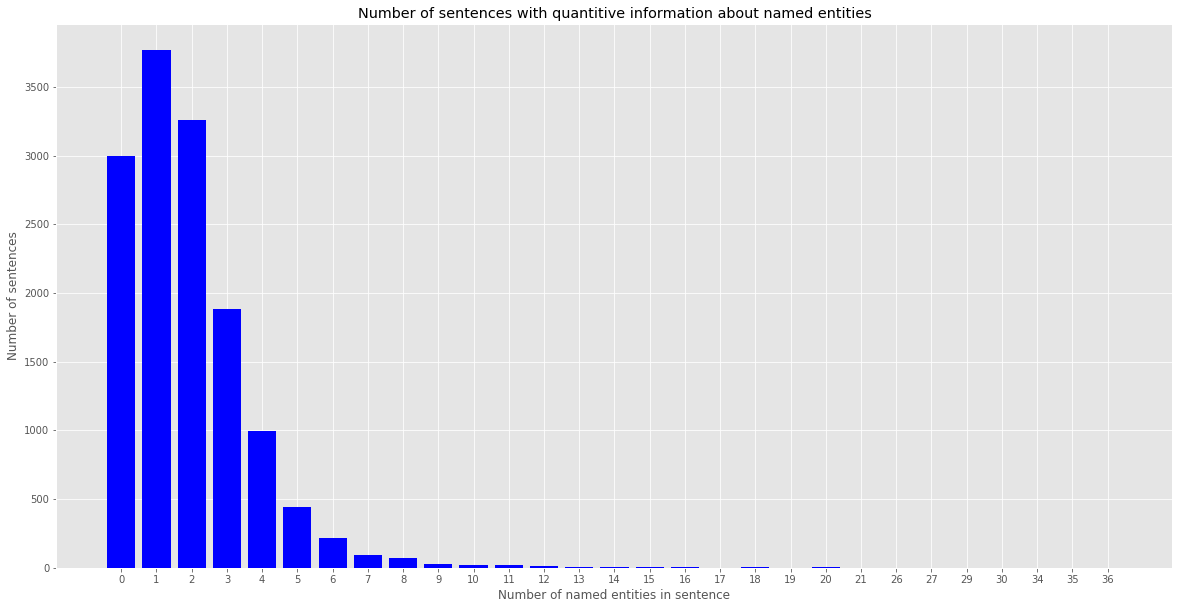

In [7]:

print(info.items())

values = sorted(info.items())

x = [e[0] for e in values]
y = [e[1] for e in values]

plt.style.use('ggplot')

# x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
# energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='blue')
plt.xlabel("Number of named entities in sentence")
plt.ylabel("Number of sentences")
plt.title("Number of sentences with quantitive information about named entities")

plt.xticks(x_pos, x)
plt.show()

In [8]:
sentences_with_2_entities = []
entity_tokens_for_sentences_2 = []

for s, e in zip (tokenized_sentences, sentence_entity_tags):
    number_of_entities = 0
    for tag in e:
        if tag != 'O':
            number_of_entities+=1

    if number_of_entities == 2:
        sentences_with_2_entities.append(s)
        entity_tokens_for_sentences_2.append(e)

        
for i in range(len(sentences_with_2_entities)):
    print(sentences_with_2_entities[i], entity_tokens_for_sentences_2[i])




['Премьер-министр', 'Японии', 'Наото Кан', 'огласил', 'новый', 'состав', 'правительства', 'страны', '.'] ['O', 'LOC', 'PER', 'O', 'O', 'O', 'O', 'O', 'O']
['Так', ',', 'бывшего', 'генерального', 'секретаря', 'правительства', 'Йошито Сенгоку', 'сменил', 'на', 'его', 'посту', 'Юкио Эдано', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'PER', 'O']
['Он', 'также', 'заверил', ',', 'что', 'в', 'случае', ',', 'если', 'Мубарак', 'уйдет', 'в', 'отставку', ',', '``', 'Братья-мусульмане', "''", 'не', 'будут', 'стремиться', 'к', 'единоличной', 'власти', 'в', 'стране', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['Сегодня', 'утром', 'неизвестные', 'расстреляли', 'машину', 'начальника', 'управления', 'информационной', 'политики', 'и', 'пресс-службы', 'президента', 'Дагестана', 'Гаруна Курбанова', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'PER', 'O']
['Около'

['Поступавшие', 'на', 'протяжении', 'последних', 'лет', 'в', 'прокуратуру', 'Ростовской области', 'многочисленные', 'обращения', 'об', 'указанных', 'нарушениях', 'надлежащего', 'рассмотрения', 'не', 'получали', "''", ',', '-', 'отметили', 'в', 'Генеральной прокуратуре', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O']
['Валерий Кузнецов', 'родился', '23', 'ноября', '1963', 'года', 'в', 'Ростовской области', '.'] ['PER', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O']
['Начинал', 'с', 'должности', 'следователя', 'прокуратуры', 'Ташкентской области', 'Узбекской ССР', '.'] ['O', 'O', 'O', 'O', 'O', 'LOC', 'LOC', 'O']
['Указом', 'Президента', 'Российской Федерации', '9', 'января', '2008', 'года', 'за', 'заслуги', 'в', 'укреплении', 'законности', 'и', 'правопорядка', 'и', 'многолетнюю', 'добросовестную', 'службу', 'Кузнецов', 'награжден', 'орденом', 'Мужества', '.'] ['O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['Как', 'сообщил', 'его', 'сын', 'Питер Сорос', ',', '87-летний', 'бизнесмен', 'скончался', 'в', 'больнице', 'Нью-Йорка', 'после', 'продолжительной', 'борьбы', 'с', 'целым', 'рядом', 'болезней', ',', 'среди', 'которых', 'рак', ',', 'диабет', 'и', 'болезнь', 'Паркинсона', '.'] ['O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['Пол Сорос', 'являлся', 'основателем', 'логистической', 'компании', 'Soros Associates', ',', 'разрабатывающей', 'способы', 'перевозки', 'оптовых', 'партий', 'товаров', '.'] ['PER', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['Как', 'отмечает', 'BBC News', ',', '12', 'сентября', 'королева', 'Елизавета II', 'формально', 'утвердила', 'его', 'в', 'должности', '.'] ['O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'O']
['Все', 'кандидаты', 'прошли', 'серию', 'собеседований', 'с', 'мэром', 'столицы', 'Борисом Джонсоном', 'и', 'м

In [9]:
pair_tag_dict = {
    'LOC-LOC':[],
    'LOC-ORG':[],
    'LOC-PER':[],
    'ORG-ORG':[],
    'ORG-PER':[],
    'PER-PER':[],
}


In [10]:
for s, e in zip(sentences_with_2_entities, entity_tokens_for_sentences_2):
    
    pair_tag = []
    for tag in e:
        if tag != 'O':
            pair_tag.append(tag)
    pair_tag = sorted(pair_tag)
    
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'LOC':
        pair_tag_dict['LOC-LOC'].append((s,e))
        
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'ORG':
        pair_tag_dict['LOC-ORG'].append((s,e))
        
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'PER':
        pair_tag_dict['LOC-PER'].append((s,e))
        
    if pair_tag[0] == 'ORG' and pair_tag[1] == 'ORG':
        pair_tag_dict['ORG-ORG'].append((s,e))
        
    if pair_tag[0] == 'ORG' and pair_tag[1] == 'PER':
        pair_tag_dict['ORG-PER'].append((s,e))
        
    if pair_tag[0] == 'PER' and pair_tag[1] == 'PER':
        pair_tag_dict['PER-PER'].append((s,e))

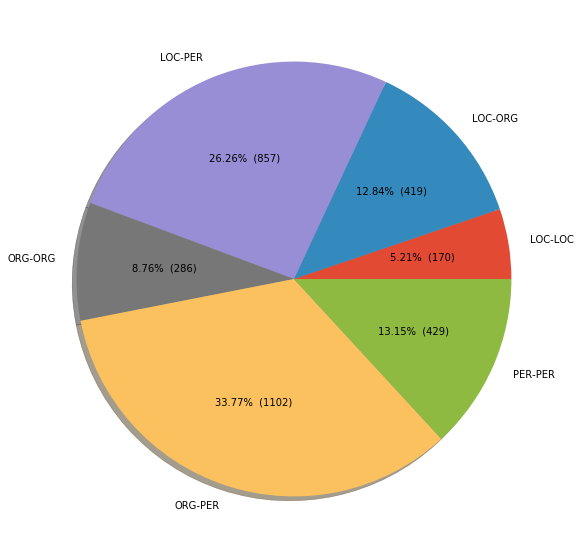

In [11]:
x = list(pair_tag_dict.keys())

y = [len(pair_tag_dict[e]) for e in x]
def my_autopct(values):
    def autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return autopct

fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct=my_autopct(y),
        shadow=True, )
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
sentences_without_entities = []
for s, e in zip(sentences_with_2_entities, entity_tokens_for_sentences_2):
    sentence_without_entities = ''
    
    for i in range(len(e)):
        if e[i] == 'O':
            sentence_without_entities +=s[i]+' '
    sentences_without_entities.append(sentence_without_entities)




In [22]:
print(len(sentences_without_entities))


3263


In [28]:
from tqdm.notebook import tqdm

laser = LASEREmbedder('ru')

# sentences_embeddings = laser.embed(sentences_without_entities)
sentences_embeddings = [] 
for s in tqdm(sentences_without_entities, total=len(sentences_without_entities)):
    sentence_embedding = laser.embed(s)
    sentences_embeddings.append(sentence_embedding)
    
    
sentences_embeddings = np.array(sentences_embeddings)
print(sentences_embeddings.shape)


(3263, 1024)


In [33]:
data_dict = {
    'sentences_embeddings': sentences_embeddings,
    'sentences': sentences_with_2_entities,
    'entities': entity_tokens_for_sentences_2,
    'sentences_without_entities': sentences_without_entities,
}

In [34]:
with open('data.pickle', 'wb') as f:
    pickle.dump(data_dict, f)
    


# Clusterization

In [30]:
import sys
sys.path.append('..')

import os
from pathlib import Path

import re
import nltk 
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

from tqdm.notebook import tqdm
import numpy as np 
import pickle

from src.embedders import LASEREmbedder

In [2]:
with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)


In [4]:
data_dict.keys()

dict_keys(['sentences_embeddings', 'sentences', 'entities', 'sentences_without_entities'])

In [5]:
print(data_dict['sentences_embeddings'])

[[ 3.7036524e-03  3.6355184e-05 -6.8229926e-04 ...  2.6827652e-02
  -6.9368882e-03  9.1848085e-03]
 [ 1.9187059e-02  6.6152522e-03  2.6461150e-02 ...  2.6461633e-02
   3.5657634e-03  9.9599957e-03]
 [ 9.9628419e-03 -1.9249797e-05  2.0217979e-02 ...  4.9015634e-02
   8.0924472e-03  1.9063871e-02]
 ...
 [ 9.4517134e-03  8.0866637e-03  1.7446375e-02 ...  1.2859862e-02
   2.9719155e-02  3.0339286e-03]
 [ 1.0557393e-02 -5.2657437e-05  4.4975481e-03 ...  4.8239082e-02
   1.1767855e-02  2.9148472e-02]
 [ 1.5936881e-02 -2.7375314e-05  2.6948471e-03 ... -2.1521202e-03
   8.1575271e-03  3.0372236e-02]]


In [12]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=20, covariance_type='full')

model.fit(data_dict['sentences_embeddings'])
labels = model.predict(data_dict['sentences_embeddings'])

In [13]:
print(labels)

[ 9  9 11 ...  7 16 19]


In [26]:
import numpy as np 
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(data_dict['sentences_embeddings'])
X_embedded.shape 

(3263, 2)

In [27]:
print(X_embedded)

[[ 18.784742    -0.41746682]
 [ 17.800018    -4.670469  ]
 [-11.322858    38.19533   ]
 ...
 [-10.288213    10.365825  ]
 [ 49.07061     20.414896  ]
 [-14.233185    51.053425  ]]


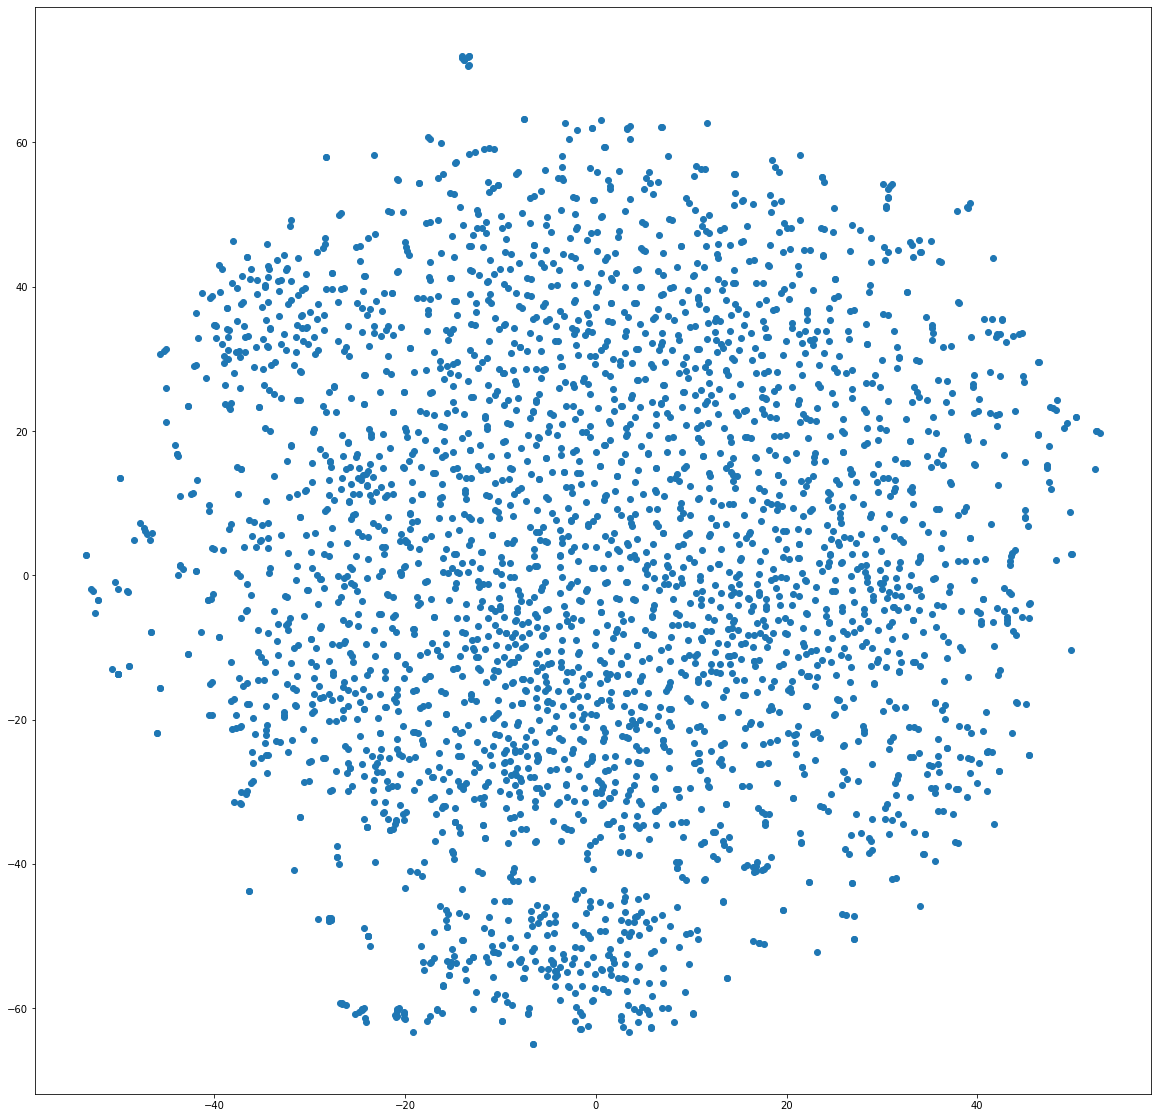

In [28]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1]);
plt.show()

In [ ]:
number_of_centroids = 30


models = []

for i in tqdm(range(1, number_of_centroids), total=number_of_centroids-1):
    model = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(data_dict['sentences_embeddings']) 
    models.append(model)
    
    
plt.plot(n_components, [m.bic(data_dict['sentences_embeddings']) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_dict['sentences_embeddings']) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

